In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv("ETData - ETData.csv")

In [2]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  373 non-null    float64
 1   Salary               373 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


<AxesSubplot:xlabel='Years of Experience', ylabel='Salary'>

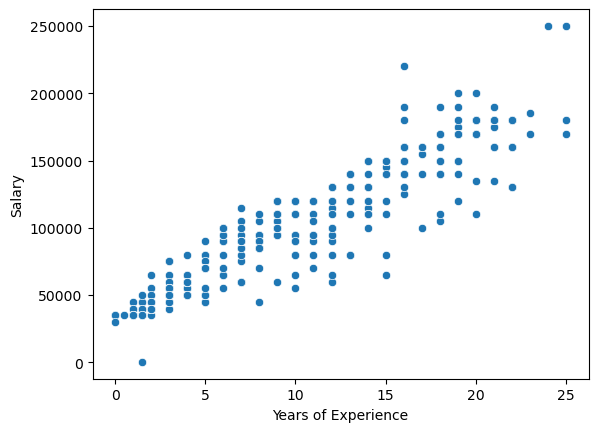

In [3]:
sns.scatterplot(data=df, x="Years of Experience", y="Salary")

In [4]:
def getLinearPrediction(xValue, slope, intercept):
    return slope*xValue + intercept

In [5]:
def getRMSEAccuracy(df, slope, intercept, xLabel, yLabel):
    squared_errors = 0

    for i in range(len(df[yLabel])):
        dataY = df.iloc[i][yLabel]
        dataX = df.iloc[i][xLabel]
        prediction = getLinearPrediction(dataX, slope, intercept)

        # Calculate squared error
        squared_errors += (prediction - dataY)**2

    # Calculate mean squared error
    mean_squared_error = squared_errors / len(df[yLabel])

    # Calculate root mean squared error
    rmse = np.sqrt(mean_squared_error)

    return rmse

In [6]:
print(getRMSEAccuracy(df, 10000, 0, "Years of Experience", "Salary"))

38.61854767108424


In [7]:
print(getRMSEAccuracy(df, 7000, 40000, "Years of Experience", "Salary"))

57.17818943395612


In [10]:
def findOptimalLinearEquation(df, xLabel, yLabel, slope_range, intercept_range):
    best_slope = None
    best_intercept = None
    best_accuracy = float('inf')  # Initialize with a high value

    for slope in slope_range:
        for intercept in intercept_range:
            accuracy = getRMSEAccuracy(df, slope, intercept, xLabel, yLabel)

            # Update the best values if the current accuracy is lower
            if accuracy < best_accuracy:
                best_slope = slope
                best_intercept = intercept
                best_accuracy = accuracy

    return best_slope, best_intercept, best_accuracy



In [12]:
optimal_slope, optimal_intercept, optimal_accuracy = findOptimalLinearEquation(df, "Years of Experience", "Salary", np.arange(8000, 10000, 100), np.arange(800, 1200, 100))

print("Optimal Slope:", optimal_slope)
print("Optimal Intercept:", optimal_intercept)
print("Optimal RMSE Accuracy:", optimal_accuracy)

Optimal Slope: 9200
Optimal Intercept: 800
Optimal RMSE Accuracy: 38.11712507166259


In [13]:
optimal_slope, optimal_intercept, optimal_accuracy = findOptimalLinearEquation(df, "Years of Experience", "Salary", np.arange(9100, 9300, 10), np.arange(700, 900, 10))

print("Optimal Slope:", optimal_slope)
print("Optimal Intercept:", optimal_intercept)
print("Optimal RMSE Accuracy:", optimal_accuracy)

Optimal Slope: 9240
Optimal Intercept: 700
Optimal RMSE Accuracy: 38.11027622951509


In [14]:
optimal_slope, optimal_intercept, optimal_accuracy = findOptimalLinearEquation(df, "Years of Experience", "Salary", np.arange(9230, 9250, 1), np.arange(600, 800, 10))

print("Optimal Slope:", optimal_slope)
print("Optimal Intercept:", optimal_intercept)
print("Optimal RMSE Accuracy:", optimal_accuracy)

Optimal Slope: 9243
Optimal Intercept: 600
Optimal RMSE Accuracy: 38.10674987805799


In [16]:
optimal_slope, optimal_intercept, optimal_accuracy = findOptimalLinearEquation(df, "Years of Experience", "Salary", np.arange(9242, 9244, 0.1), np.arange(500, 700, 10))

print("Optimal Slope:", optimal_slope)
print("Optimal Intercept:", optimal_intercept)
print("Optimal RMSE Accuracy:", optimal_accuracy)

Optimal Slope: 9243.900000000007
Optimal Intercept: 500
Optimal RMSE Accuracy: 38.10444649589776
